In [1]:
from transformers import NllbTokenizerFast
from tqdm.auto import tqdm
from datasets import Dataset, concatenate_datasets
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

model_repo = "facebook/nllb-200-distilled-600M"
nllb_tokenizer = NllbTokenizerFast.from_pretrained(model_repo, src_lang="tha_Thai", tgt_lang="eng_Latn")

# Load individual file

In [39]:
df = pd.read_csv("scb-mt-en-th-2020+mt-opus-cleaned/mt_opus_kde4.csv")
# df = pd.read_csv("scb-mt-en-th-2020+mt-opus-cleaned/aqdf_corpus.csv")
df.rename(columns={'en_text': 'en', 'th_text': 'th'}, inplace=True)
df.dropna(inplace=True)
data = {"translation": df.to_dict(orient="records")}

In [38]:
df[df['en'].apply(lambda x: not isinstance(x, str))]

,en,th
55,NaN,ไม่มีการเรียกใหม่
269,NaN,ไม่ต้อง
691,NaN,ไม่มี
4201,NaN,ไม่ใช้
4758,NaN,ไม่ใช้gain control
13785,NaN,ไม่มี@ item: inlistbox Grid spacing
15820,NaN,ไม่ป้องกัน
15909,NaN,ไม่ป้องกันFocus Stealing Prevention Level
17733,NaN,ตัวเริ่มหน้าต่าง...
20155,NaN,ถังขยะ


In [35]:
df.dtypes != object

en    False
th    False
dtype: bool

In [28]:
data["translation"][0]["en"]

True

In [40]:
dataset = Dataset.from_dict(data)

# Load all file

In [2]:
# get all available datasets
data_files = list(Path("../data/scb-mt-en-th-2020+mt-opus-cleaned/").glob("*.csv"))

In [3]:
source_lang = "th"
target_lang = "en"

def preprocess_function(examples):
    inputs = [example[source_lang] for example in examples["translation"]]
    targets = [example[target_lang] for example in examples["translation"]]
    # model_inputs = nllb_tokenizer(inputs, text_target=targets, max_length=64, truncation=True)
    model_inputs = nllb_tokenizer(inputs, text_target=targets)
    return model_inputs

In [4]:
tokenized_dataset = []
token_distribution_data = []
graph_title = []
for data_file in data_files:
    print(f"Processing {data_file.stem}")
    graph_title.append(data_file.stem)
    df = pd.read_csv(data_file)
    df.rename(columns={'en_text': 'en', 'th_text': 'th'}, inplace=True)
    df.dropna(inplace=True)
    data = {"translation": df.to_dict(orient="records")}
    dataset = Dataset.from_dict(data)
    tokenized_sentence = dataset.map(
        preprocess_function, batched=True, num_proc=8, remove_columns=dataset.features)
    tokenized_dataset.append(tokenized_sentence)

    # create distribution graph
    distribution = {}
    for input_ids in tokenized_sentence["input_ids"]:
        if not len(input_ids) in distribution:
            distribution[len(input_ids)] = 1
        else:
            distribution[len(input_ids)] += 1

    token_distribution_data.append(distribution)

Processing thai_websites_corpus


Map (num_proc=8):   0%|          | 0/120279 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1030 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1138 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1055 > 1024). Running this sequence through the model will result in indexing errors


Processing mt_opus_tanzil


Map (num_proc=8):   0%|          | 0/92411 [00:00<?, ? examples/s]

Processing fake_reviews_yn


Map (num_proc=8):   0%|          | 0/280208 [00:00<?, ? examples/s]

Processing wikipedia_corpus


Map (num_proc=8):   0%|          | 0/33756 [00:00<?, ? examples/s]

Processing mozilla_corpus


Map (num_proc=8):   0%|          | 0/33797 [00:00<?, ? examples/s]

Processing mt_opus_kde4


Map (num_proc=8):   0%|          | 0/51306 [00:00<?, ? examples/s]

Processing singapore_corpus


Map (num_proc=8):   0%|          | 0/43745 [00:00<?, ? examples/s]

Processing mt_opus_qed


Map (num_proc=8):   0%|          | 0/251340 [00:00<?, ? examples/s]

Processing fake_reviews_hope


Map (num_proc=8):   0%|          | 0/133329 [00:00<?, ? examples/s]

Processing fake_reviews_crowd


Map (num_proc=8):   0%|          | 0/24587 [00:00<?, ? examples/s]

Processing mfa_corpus


Map (num_proc=8):   0%|          | 0/1019 [00:00<?, ? examples/s]

Processing mt_opus_opensubtitles


Map (num_proc=8):   0%|          | 0/2916099 [00:00<?, ? examples/s]

Processing paracrawl_corpus


Map (num_proc=8):   0%|          | 0/60029 [00:00<?, ? examples/s]

Processing task_master_corpus


Map (num_proc=8):   0%|          | 0/222391 [00:00<?, ? examples/s]

Processing mt_opus_ubuntu


Map (num_proc=8):   0%|          | 0/3384 [00:00<?, ? examples/s]

Processing aqdf_corpus


Map (num_proc=8):   0%|          | 0/13503 [00:00<?, ? examples/s]

Processing assorted_government_corpus


Map (num_proc=8):   0%|          | 0/24378 [00:00<?, ? examples/s]

Processing mt_opus_tatoeba


Map (num_proc=8):   0%|          | 0/1081 [00:00<?, ? examples/s]

Processing paraphrase_corpus


Map (num_proc=8):   0%|          | 0/10371 [00:00<?, ? examples/s]

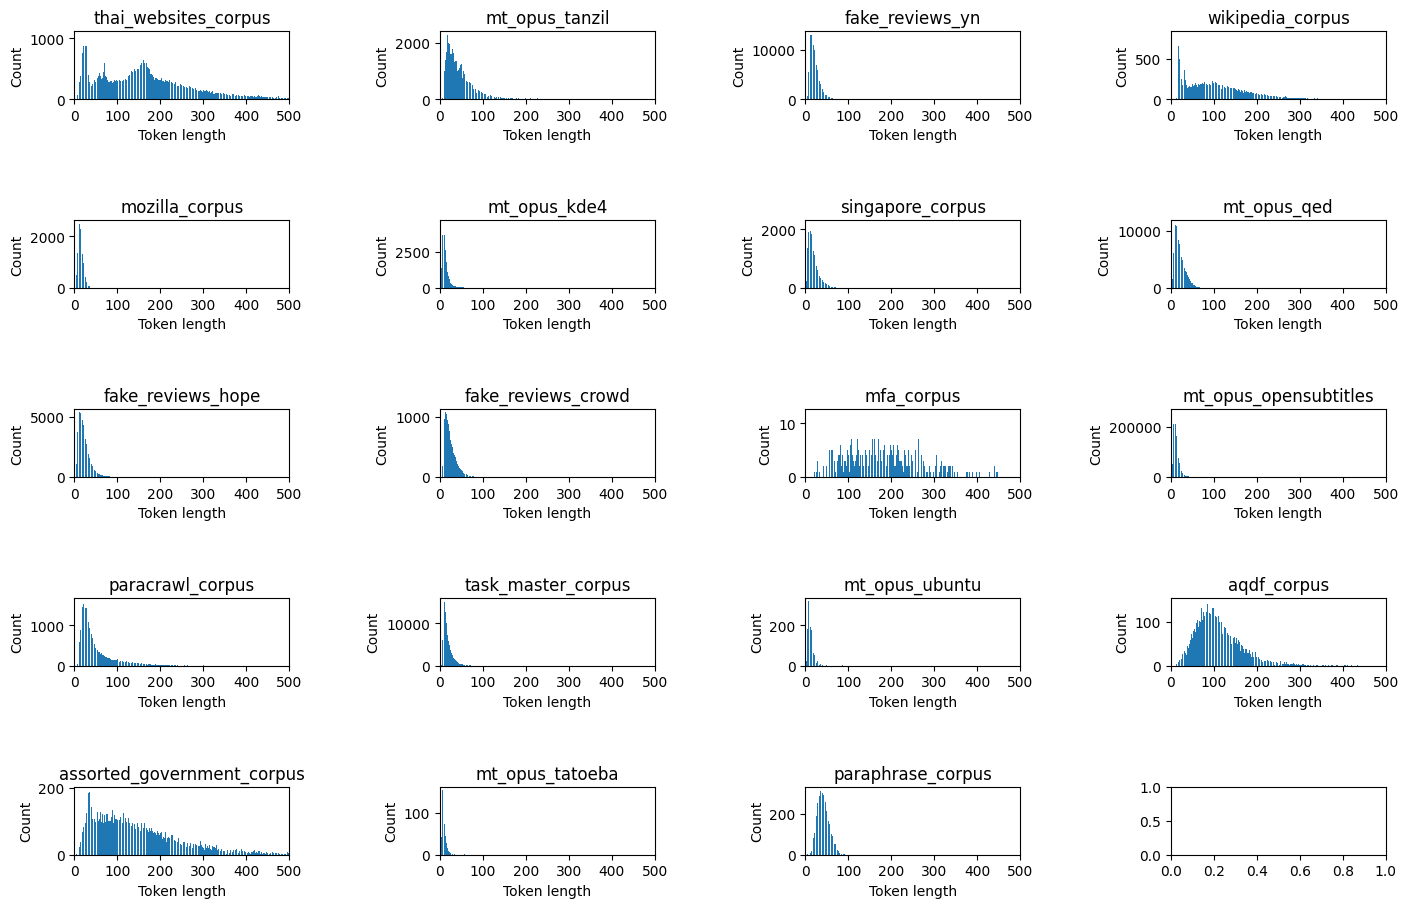

In [5]:
# plot graph
fig, axs = plt.subplots(5, 4, figsize=(15, 10))
axs = axs.flatten()
for i, (title, data) in enumerate(zip(graph_title, token_distribution_data)):
    axs[i].bar(data.keys(), data.values())
    axs[i].set_title(title)
    axs[i].set_xlabel("Token length")
    axs[i].set_ylabel("Count")
    axs[i].set_xlim([0, 500])
fig.tight_layout(pad=4.0)
plt.show()

In [9]:
dataset = concatenate_datasets(tokenized_dataset)

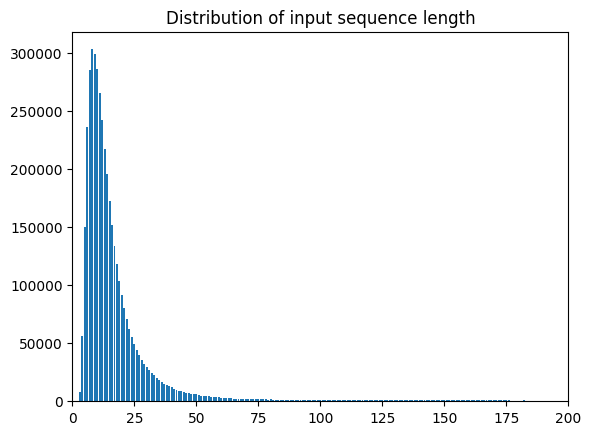

In [10]:
distribution = {}
for input_ids in dataset["input_ids"]:
    if not len(input_ids) in distribution:
        distribution[len(input_ids)] = 1
    else:
        distribution[len(input_ids)] += 1

# plot the distribution
plt.title("Distribution of input sequence length")
plt.bar(distribution.keys(), distribution.values())
plt.xlim([0, 200])
plt.show()

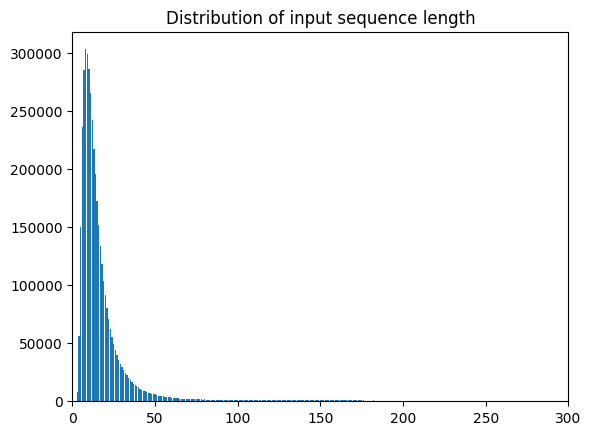

In [11]:
# plot the distribution
plt.title("Distribution of input sequence length")
plt.bar(distribution.keys(), distribution.values())
plt.xlim([0, 300])
plt.show()

In [32]:
dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 4317013
})

In [35]:
dataset = dataset.shuffle(seed=3407)
dataset = dataset.train_test_split(test_size=0.15)

In [36]:
dataset.save_to_disk("nllb-scb+opus-hf-tokenized")

Saving the dataset (0/2 shards):   0%|          | 0/3669461 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/647552 [00:00<?, ? examples/s]